In [1]:
import sys
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import numpy as np
import tensorflow as tf
from tensorflow.contrib.framework import arg_scope
from tensorflow.examples.tutorials.mnist import input_data
import tensorbayes as tb
from tensorbayes.layers import *
from tensorbayes.distributions import log_bernoulli_with_logits, log_normal
from tensorbayes.nbutils import show_default_graph as show_graph
from tensorflow.examples.tutorials.mnist import input_data

In [40]:
tf.reset_default_graph()
x = placeholder((None, 784), name='x')

with tf.variable_scope('encode'):
    h = dense(x, 500, scope='layer1', activation=tf.nn.elu)
    h = dense(h, 500, scope='layer2', activation=tf.nn.elu)

with tf.variable_scope('sample'):
    z_m = dense(h, 3, scope='mean')
    z_v = dense(h, 3, scope='var', activation=tf.nn.softplus) + 1e-5
    z = gaussian_sample(z_m, z_v)
    
with tf.variable_scope('decode'):
    h = dense(z, 500, scope='layer1', activation=tf.nn.elu)
    h = dense(h, 500, scope='layer2', activation=tf.nn.elu)    
    x_logits = dense(h, 784, scope='logits')

In [41]:
show_graph()

In [42]:
with tf.name_scope('loss'):
    recon = -log_bernoulli_with_logits(x, x_logits)
    kl = -log_normal(z, constant(0), constant(1)) + log_normal(z, z_m, z_v) 
    loss = tf.reduce_mean(recon + kl)

In [43]:
# Optimize
train_step = tf.train.AdamOptimizer().minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
iterep = len(mnist.train.images)/256
for i in range(iterep * 2000):
    x_train, y_train = mnist.train.next_batch(256)
    _, l = sess.run([train_step, loss], feed_dict={'x:0': x_train})
    message = "loss: {:.2e}".format(l)
    end_epoch, epoch = tb.utils.progbar(i, iterep, message, bar_length=50)
    if end_epoch:
        l = sess.run(loss, feed_dict={'x:0': mnist.test.images})
        print 'Test performance:', l

Test performance: 173.157
Test performance: 158.334
Test performance: 153.09
Test performance: 149.658
Test performance: 147.429
Test performance: 146.415
Test performance: 145.042
Test performance: 143.988
Test performance: 142.891
Test performance: 141.83
[=                                                 ]   2%. loss: 1.37e+02

In [16]:
% pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Random sample

In [17]:
z = placeholder((None, 2), name='z')
with tf.variable_scope('decode', reuse=True):
    h = dense(z, 500, scope='layer1', activation=tf.nn.elu)
    h = dense(h, 500, scope='layer2', activation=tf.nn.elu)    
    x_logits = dense(h, 784, scope='logits')
    x = tf.nn.sigmoid(x_logits)

(-0.5, 27.5, 27.5, -0.5)

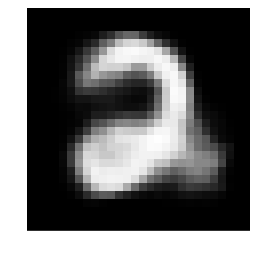

In [37]:
noise = np.random.randn(1, 2)
img = sess.run(x, feed_dict={'z:0': noise})
plt.imshow(img.reshape(28, 28), interpolation='None', cmap='Greys_r')
plt.axis('off')

# Encoding distribution

In [38]:
z_ = sess.run(z_m, feed_dict={'x:0': mnist.train.images})

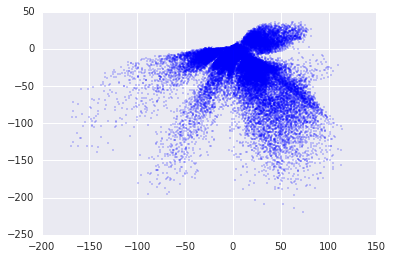

In [39]:
plt.scatter(z_[:, 0], z_[:, 1], linewidth=0, s=1)